# Time functions in numerical relativity: Marginally bound dust collapse by Eardley & Smarr
##  Geoff Cope
##  University of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 28, 2021  

Here we concentrate on the metric given by equation 9 which is the Tolman - Bondi spacetime.

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.19.2239

Effect of Inhomogeneity on Cosmological Models by Tolman:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1076370/

Spherically symmetrical models in general relativity by Bondi: SEE APPENDIX HERE FOR CALCULATION OF RICCI TENSOR

https://adsabs.harvard.edu/full/1947MNRAS.107..410B

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,phi,dt,dr,dtheta,dphi = symbols( 't r theta phi dt dr dtheta dphi' , positive = True, real = True  ) 

In [4]:
X = Function('X')(r,t)
X

In [5]:
Y = Function('Y')(r,t)
Y

In [6]:
variables = Matrix( [t,r,theta,phi] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [7]:
differentials = Matrix( [dt,dr,dtheta,dphi])
differentials 

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [10]:
lineElement = expand( -dt**2 + X**2 * dr**2 + Y**2 * (dtheta**2 + sin(theta)**2 * dphi**2 ) )
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡-1     0         0             0        ⎤
⎢                                        ⎥
⎢     2                                  ⎥
⎢0   X (r, t)     0             0        ⎥
⎢                                        ⎥
⎢               2                        ⎥
⎢0      0      Y (r, t)         0        ⎥
⎢                                        ⎥
⎢                         2          2   ⎥
⎣0      0         0      Y (r, t)⋅sin (θ)⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡-1     0         0             0        ⎤
⎢                                        ⎥
⎢     2                                  ⎥
⎢0   X (r, t)     0             0        ⎥
⎢                                        ⎥
⎢               2                        ⎥
⎢0      0      Y (r, t)         0        ⎥
⎢                                        ⎥
⎢                         2          2   ⎥
⎣0      0         0      Y (r, t)⋅sin (θ)⎦

In [14]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t r theta phi"  , positive = True, real = True)
t,r,theta,phi = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                            ⎡             ∂
⎢                                                                            ⎢             ─
⎢                                                                            ⎢             ∂
⎢                                                                            ⎢     0       ─
⎢                                                                            ⎢              
⎢                                                                            ⎢              
⎢⎡0           0                    0                        0             ⎤  ⎢∂            ∂
⎢⎢                                                                        ⎥  ⎢──(X(r, t))  ─
⎢⎢           ∂                                                            ⎥  ⎢∂t           ∂
⎢⎢0  X(r, t)⋅──(X(r, t))           0                        0             ⎥  ⎢───────────  ─
⎢⎢           ∂t                                                       

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                 2              2                                                          
⎢                ∂              ∂                                                          ⎛
⎢             2⋅───(Y(r, t))   ───(X(r, t))                                                ⎜
⎢                 2              2                                                       2⋅⎜
⎢               ∂t             ∂t                                                          ⎝
⎢           - ────────────── - ────────────                                              ───
⎢                Y(r, t)         X(r, t)                                                    
⎢                                                                                           
⎢                                                          ⎛                                
⎢  ⎛             2                                    ⎞    ⎜        ∂           ∂           
⎢  ⎜            ∂              ∂           ∂          ⎟  2⋅⎜X(r, t)⋅──

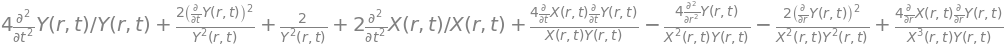

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                    2                      
⎢                 2                                                 ∂                       
⎢    ⎛∂          ⎞                   ∂           ∂             2.0⋅───(Y(r, t))     ⎛∂      
⎢1.0⋅⎜──(Y(r, t))⎟               2.0⋅──(X(r, t))⋅──(Y(r, t))         2              ⎜──(Y(r,
⎢    ⎝∂t         ⎠      1.0          ∂t          ∂t                ∂r               ⎝∂r     
⎢────────────────── + ──────── + ─────────────────────────── - ──────────────── - ──────────
⎢      2               2               X(r, t)⋅Y(r, t)          2                  2        
⎢     Y (r, t)        Y (r, t)                                 X (r, t)⋅Y(r, t)   X (r, t)⋅Y
⎢                                                                                           
⎢                                                                                           
⎢                                       ⎛             2               

In [22]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [23]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [24]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                 2              2                                                          
⎢                ∂              ∂                                                          ⎛
⎢             2⋅───(Y(r, t))   ───(X(r, t))                                                ⎜
⎢                 2              2                                                       2⋅⎜
⎢               ∂t             ∂t                                                          ⎝
⎢           - ────────────── - ────────────                                              ───
⎢                Y(r, t)         X(r, t)                                                    
⎢                                                                                           
⎢                                                          ⎛                                
⎢  ⎛             2                                    ⎞    ⎜        ∂           ∂           
⎢  ⎜            ∂              ∂           ∂          ⎟  2⋅⎜X(r, t)⋅──

In [49]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡    ⎛             2    ⎞                                                                   
⎢    ⎜⎛∂          ⎞     ⎟  3              2               ∂           ∂                     
⎢1.0⋅⎜⎜──(Y(r, t))⎟  + 1⎟⋅X (r, t) + 2.0⋅X (r, t)⋅Y(r, t)⋅──(X(r, t))⋅──(Y(r, t)) - 2.0⋅X(r,
⎢    ⎝⎝∂t         ⎠     ⎠                                 ∂t          ∂t                    
⎢                                                                                           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                 3        2
⎢                                                                                X (r, t)⋅Y 
⎢                                                                                           
⎢                                                                                           
⎢                                                                ⎛    

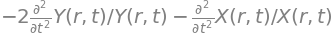

In [64]:
XttYtt = ricciSimplified[0,0]
XttYtt

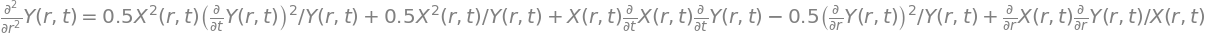

In [61]:
d2ydr2 = Eq(diff(Y,r,r),solve( einst.tensor()[0,0] , diff(Y,r,r) )[0])
d2ydr2

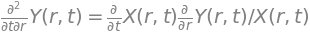

In [63]:
d2ydtdr = Eq(diff(Y,t,r),solve( einst.tensor()[1,0], diff(Y,t,r) )[0])
d2ydtdr

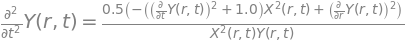

In [60]:
d2ydt2 = Eq(diff(Y,t,t),solve( einst.tensor()[1,1] , diff(Y,t,t) )[0])
d2ydt2